In [256]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [257]:
df=pd.read_csv("homeprices_banglore.csv")
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [258]:
x=preprocessing.MinMaxScaler()
y=preprocessing.MinMaxScaler()
sx=x.fit_transform(df.drop("price",axis="columns"))
sy=y.fit_transform(df["price"].values.reshape(df.shape[0],1))

In [259]:
sy.reshape(20)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [260]:

sy.reshape(sy.shape[0])

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [261]:
def gradient_descent(x,y,epoches,learningrate=0.01):
    number_of_features=x.shape[1]
    w=np.ones(number_of_features)
    b=0
    total_samples=x.shape[0]

    total_cost=[]
    epoch=[]

    for i in range(epoches):
        Predict=np.dot(w,x.T)+b
        
        dw=-(2/total_samples)*(x.T.dot(y-Predict))
        db= -(2/total_samples)*np.sum(y-Predict)
        w=w-learningrate*dw
        b=b-learningrate*db
        print(dw)
        cost=np.mean(np.square(y-Predict))
        if i%10==0:
            total_cost.append(cost)
            epoch.append(i)
    return w,b,cost,total_cost,epoch
        
        
     

In [262]:
w, b, cost, total_cost, epoch=gradient_descent(sx,sy.reshape(sy.shape[0]),500)


[0.44868254 0.55434464]
[0.43751496 0.54005438]
[0.42665388 0.52615802]
[0.4160908  0.51264465]
[0.40581749 0.49950368]
[0.39582593 0.48672481]
[0.38610833 0.47429799]
[0.3766571 0.4622135]
[0.36746487 0.45046186]
[0.35852448 0.43903386]
[0.34982896 0.42792053]
[0.34137153 0.41711316]
[0.33314562 0.4066033 ]
[0.3251448  0.39638271]
[0.31736287 0.38644337]
[0.30979375 0.37677752]
[0.30243157 0.36737757]
[0.2952706  0.35823617]
[0.28830527 0.34934616]
[0.28153018 0.34070059]
[0.27494006 0.33229269]
[0.26852979 0.32411588]
[0.26229439 0.31616378]
[0.25622905 0.30843015]
[0.25032904 0.30090896]
[0.2445898  0.29359433]
[0.23900688 0.28648054]
[0.23357595 0.27956203]
[0.22829282 0.2728334 ]
[0.2231534 0.2662894]
[0.21815372 0.25992491]
[0.2132899  0.25373497]
[0.20855819 0.24771476]
[0.20395495 0.24185956]
[0.19947661 0.23616483]
[0.19511973 0.23062611]
[0.19088094 0.2252391 ]
[0.18675699 0.21999959]
[0.1827447 0.2149035]
[0.17884097 0.20994687]
[0.17504282 0.20512584]
[0.17134732 0.20043665

50 50


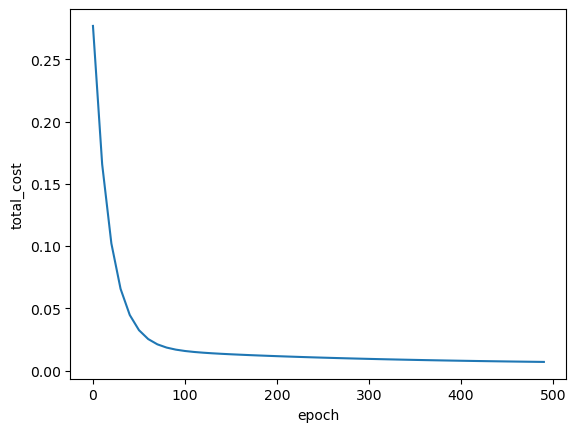

In [263]:
print(len(epoch),len(total_cost))
plt.xlabel("epoch")
plt.ylabel("total_cost")
plt.plot(epoch,total_cost)

In [264]:
def predict(area,bedrooms,w,b):
    scaled_X = x.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return y.inverse_transform([[scaled_price]])[0][0]
print(w,b)
predict(1000,2,w,b)

[0.70712464 0.67456527] -0.23034857438407427


C:\Users\Ghanathey Akash\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [265]:
random_indices = np.random.choice(sx.shape[0], size=5, replace=False)
sample_x = sx[random_indices]
sample_y=sy[random_indices]


In [266]:
print(sample_x,sample_y)

[[0.12758621 0.25      ]
 [0.06896552 0.25      ]
 [0.24862069 0.5       ]
 [0.67931034 0.5       ]
 [0.12931034 0.25      ]] [[0.04444444]
 [0.04444444]
 [0.31851852]
 [0.51851852]
 [0.07407407]]


In [296]:
def mini_batch_GD(sx,sy,epoch,learning_rate=0.01):
    number_of_features=sx.shape[1]
    w=np.ones(number_of_features)
    b=0
    total_samples=sx.shape[0]
    cost_list = []
    epoch_list = []
    
    for i in range(epoch):
        random_indices = np.random.choice(sx.shape[0], size=5, replace=False)
        sample_x = sx[random_indices]
        sample_y= sy[random_indices]
        
        y_predicted=np.dot(w,sample_x.T)+b
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost =  np.mean(np.square(sample_y-y_predicted))
        if i%10==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = mini_batch_GD(sx,sy.reshape(sy.shape[0],),120)


In [297]:
print(len(cost_list_sgd),len(epoch_list_sgd))

12 12


In [293]:
def predict(area,bedrooms,w,b):
    scaled_X = x.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return y.inverse_transform([[scaled_price]])[0][0]

predict(3300,4,w_sgd,b_sgd)

C:\Users\Ghanathey Akash\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


145.55601479191895

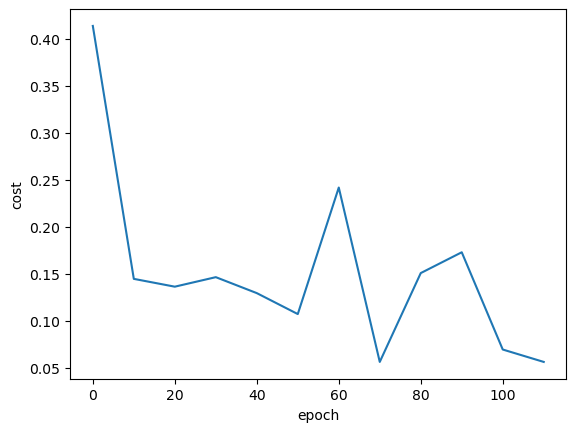

In [298]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [299]:
random_indices = np.random.permutation(total_samples)
X_tmp = sx[random_indices]
y_tmp = sy[random_indices]

In [300]:
print(X_tmp,y_tmp)

[[0.5        0.5       ]
 [0.12758621 0.25      ]
 [0.6662069  0.75      ]
 [0.67931034 0.5       ]
 [0.22068966 0.5       ]
 [0.06896552 0.25      ]
 [0.10344828 0.25      ]
 [0.62068966 0.75      ]
 [0.         0.        ]
 [0.12931034 0.25      ]
 [0.24862069 0.5       ]
 [1.         1.        ]
 [0.25517241 0.5       ]
 [0.86206897 0.75      ]
 [0.17586207 0.5       ]
 [0.13793103 0.25      ]
 [0.34482759 0.5       ]
 [0.08827586 0.25      ]
 [0.13103448 0.5       ]
 [0.68448276 0.75      ]] [[0.51111111]
 [0.04444444]
 [0.76296296]
 [0.51851852]
 [0.22222222]
 [0.04444444]
 [0.05925926]
 [0.65185185]
 [0.        ]
 [0.07407407]
 [0.31851852]
 [1.        ]
 [0.20740741]
 [0.91111111]
 [0.13333333]
 [0.14074074]
 [0.37037037]
 [0.05237037]
 [0.11851852]
 [0.8       ]]
